In [1]:
# Libraries 
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading dataset
df = pd.read_csv("../data/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [4]:
df.shape

(6819, 96)

In [7]:
# keeping bankrupt column inside bankrupd_df

bankrupd_df = df['Bankrupt?']

In [9]:
# removing bankrupt column permanently
df.drop(columns="Bankrupt?", inplace=True)

In [11]:
df.shape

(6819, 95)

In [15]:
type(df.columns)

pandas.core.indexes.base.Index

In [19]:
# The column name for out dataframe is very long. So, i replaced each column with feat_1, feat_2 and so on.

df.columns = ["feat_"+str(i) for i in range(1,96)]
df.columns

Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31',
       'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37',
       'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43',
       'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49',
       'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55',
       'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61',
       'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67',
       'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73',
       'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79',
       'feat_80', 'feat_81', 'feat_82', 'feat_83'

In [37]:
# Shape remain the same
df.shape

(6819, 95)

In [38]:
# Joining bankrupd_df and df column to work

final_df = pd.concat([df, bankrupd_df], axis=1)

In [54]:
final_df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,Bankrupt?
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,1


In [40]:
# see how many company are bankrupt and how many are not.
final_df["Bankrupt?"].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [41]:
# After joining two dataframe
final_df.shape

(6819, 96)

In [58]:
# check null values
final_df.isnull().sum() == 1



feat_1       False
feat_2       False
feat_3       False
feat_4       False
feat_5       False
             ...  
feat_92      False
feat_93      False
feat_94      False
feat_95      False
Bankrupt?    False
Length: 96, dtype: bool

<Axes: title={'center': 'Class Balance'}, xlabel='Bankrupt', ylabel='Frequency'>

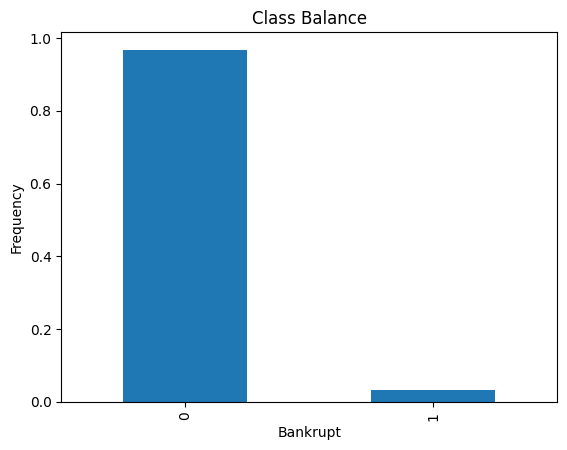

In [59]:
# Plot class balance

final_df["Bankrupt?"].value_counts(normalize=True).plot(kind="bar", xlabel="Bankrupt", ylabel="Frequency", title="Class Balance")

We can see the dataset is highly imbalanced

Text(0.5, 1.0, 'Distribution of Persistent EPS in the Last Four Seasons, by class')

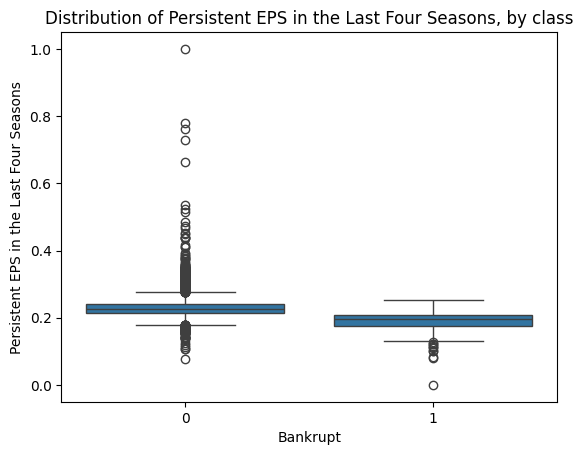

In [63]:
# Use seaborn to create a boxplot that shows the distributions of the "feat_19" column for both groups in the "bankrupt" column.

sns.boxplot(x="Bankrupt?", y = "feat_19", data=final_df)
plt.xlabel("Bankrupt")
plt.ylabel("Persistent EPS in the Last Four Seasons")
plt.title("Distribution of Persistent EPS in the Last Four Seasons, by class")

In [64]:
# lets have a statical insight of feat_19
final_df["feat_19"].describe()

count    6819.000000
mean        0.228813
std         0.033263
min         0.000000
25%         0.214711
50%         0.224544
75%         0.238820
max         1.000000
Name: feat_19, dtype: float64

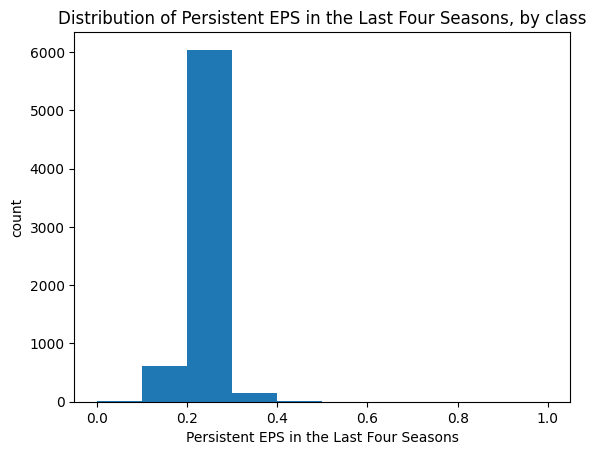

In [68]:
final_df['feat_19'].plot(kind="hist")
plt.xlabel("Persistent EPS in the Last Four Seasons")
plt.ylabel("count")
plt.title("Distribution of Persistent EPS in the Last Four Seasons, by class");

In [70]:
# # Recreate boxplot

# q1, q3 = final_df["feat_19"].quantile([0.1, 0.9])

# mask = final_df['feat_19'].between(q1, q3)

# # plot
# sns.boxenplot(x= "Bankrupt?", y = "feat_19", data=final_df)

# plt.xlabel("Bankrupt")
# plt.ylabel("Persistent EPS in the Last Four Seasons")
# plt.title("Distribution of Persistent EPS in the Last Four Seasons, by class")


In [72]:
# plot a correaltion

corr = final_df.drop("Bankrupt?", axis=1).corr()
corr

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
feat_1,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
feat_2,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
feat_3,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
feat_4,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,0.029430,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
feat_5,0.332755,0.324956,0.331755,0.999518,1.000000,0.005610,0.032232,0.026851,0.051242,0.029166,...,0.298155,0.022750,0.004038,0.999518,0.074891,-0.085407,-0.011268,-0.001158,NaN,0.120196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feat_91,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,-0.002996,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
feat_92,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,0.000774,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
feat_93,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,0.000798,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
feat_94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

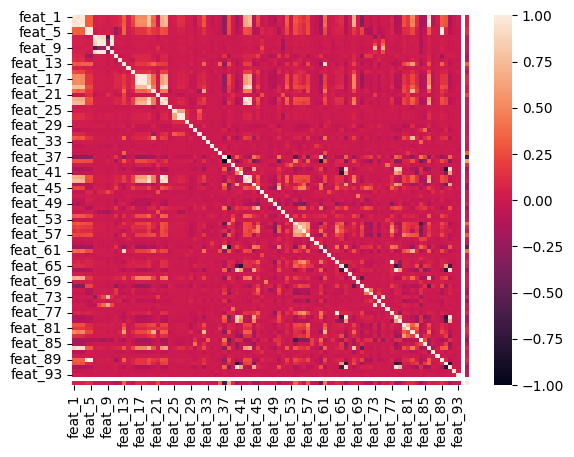

In [73]:
# let's visualize to see even more clear
sns.heatmap(corr)

# split

So let's start building that model. If you need a refresher on how and why we split data in these situations, take a look back at the Time Series module.

In [61]:
target = "Bankrupt?"
X = final_df.drop(columns=target)
y = final_df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [94]:
# import sklearn and imblearn libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


Since our dataset is highly imbalanced, Let's try over sampling

In [76]:
over_sam = RandomOverSampler(random_state=42)
X_over, y_over = over_sam.fit_resample(X_train, y_train)

In [77]:
print("X_over shape:", X_over.shape)
X_over.head()

X_over shape: (10572, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [83]:
# now we can see balanced dataset

y_over.value_counts()

Bankrupt?
0    5286
1    5286
Name: count, dtype: int64

# Build Model


In [85]:
# baseline accuracy score for your model

baseline_acc = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(baseline_acc, 4))

Baseline Accuracy: 0.969


In [86]:
# Let's build decision tree models and fit both xtrain and xover

model_reg = DecisionTreeClassifier(random_state=42)
model_reg.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
model_over = DecisionTreeClassifier(random_state=42)
model_over.fit(X_over, y_over)

DecisionTreeClassifier(random_state=42)

In [90]:
for mod in [model_reg, model_over]:
    acc_train = mod.score(X_train, y_train)
    acc_test = mod.score(X_test, y_test)

    print(f"Accuracy Training: {round(acc_train, 4)}")
    print(f"Accuracy Training: {round(acc_test, 4)}")


Accuracy Training: 1.0
Accuracy Training: 0.9531
Accuracy Training: 1.0
Accuracy Training: 0.9604


In [103]:
clf = RandomForestClassifier()

In [104]:
#  Perform cross-validation with your classifier using the over-sampled training data
cv_score = cross_val_score(clf, X_over, y_over, cv = 4, n_jobs=-1)
print(cv_score)

[0.99394627 0.99167613 0.99318956 0.99470299]


In [105]:
# params with the range of hyperparameters that you want to evaluate for your classifier.

params = {
    "n_estimators": range(25, 100, 25),
    "max_depth": range(10, 50, 10)
}

In [106]:
# Create a GridSearchCV named model that includes your classifier and hyperparameter grid. Be sure to set cv to 5, n_jobs to -1, and verbose to 1.

model = GridSearchCV(clf, 
                     param_grid=params,
                     cv = 4,
                     n_jobs=-1,
                     verbose=1)

In [107]:
model.fit(X_over, y_over)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/home/jagannath/DS_Projects/ds_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [108]:
model.cv_results_

{'mean_fit_time': array([1.75488043, 3.97285223, 5.08617139, 2.06785363, 3.97635829,
        6.31957281, 2.1501112 , 4.91422558, 7.22412211, 2.66631472,
        3.82540733, 4.67645323]),
 'std_fit_time': array([0.13410809, 0.10846343, 0.18979354, 0.0879368 , 0.12049915,
        0.33783   , 0.09103527, 0.36491496, 0.49537862, 0.23709143,
        0.21835846, 0.1407871 ]),
 'mean_score_time': array([0.02594662, 0.03860074, 0.04495108, 0.02468163, 0.03669387,
        0.06468093, 0.03347445, 0.05857635, 0.04839116, 0.02790588,
        0.03313202, 0.047759  ]),
 'std_score_time': array([0.00114585, 0.00684   , 0.00336232, 0.0026805 , 0.00041608,
        0.01172799, 0.00841072, 0.01369044, 0.00331371, 0.0053546 ,
        0.00742018, 0.00420246]),
 'param_max_depth': masked_array(data=[10, 10, 10, 20, 20, 20, 30, 30, 30, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value=999999),
 'param_n

In [109]:
# let see cv results in a dataframe

cv_result = pd.DataFrame(model.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.754880,0.134108,0.025947,0.001146,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.980704,0.977677,0.973137,0.980704,0.978055,0.003097,11
1,3.972852,0.108463,0.038601,0.006840,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.979569,0.976163,0.972758,0.982217,0.977677,0.003559,12
2,5.086171,0.189794,0.044951,0.003362,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.979569,0.978812,0.975785,0.980704,0.978717,0.001822,10
3,2.067854,0.087937,0.024682,0.002681,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.989028,0.986379,0.986757,0.991676,0.988460,0.002115,8
4,3.976358,0.120499,0.036694,0.000416,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.987514,0.988271,0.987514,0.990541,0.988460,0.001241,8
5,6.319573,0.337830,0.064681,0.011728,20,75,"{'max_depth': 20, 'n_estimators': 75}",0.989028,0.987893,0.986757,0.990919,0.988649,0.001537,7
6,2.150111,0.091035,0.033474,0.008411,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.991676,0.989784,0.992054,0.993946,0.991865,0.001478,6
7,4.914226,0.364915,0.058576,0.013690,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.992054,0.991676,0.992433,0.994703,0.992717,0.001178,4
8,7.224122,0.495379,0.048391,0.003314,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.992054,0.991298,0.993568,0.992433,0.992338,0.000819,5
9,2.666315,0.237091,0.027906,0.005355,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.992433,0.992811,0.993190,0.994703,0.993284,0.000862,3


In [110]:
#  Extract the best hyperparameters from your model and assign them to best_params.
model.best_params_

{'max_depth': 40, 'n_estimators': 75}

## Evaluate

In [111]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test,y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9692


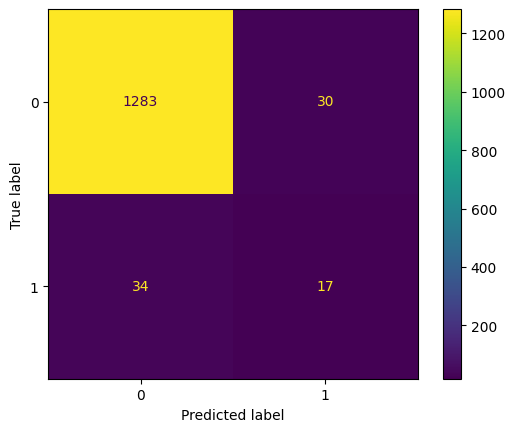

In [91]:
# Plot a confusion matrix that shows how your best model performs on your validation set. 

ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test)

In [113]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.70      0.31      0.43        51

    accuracy                           0.97      1364
   macro avg       0.83      0.65      0.71      1364
weighted avg       0.96      0.97      0.96      1364



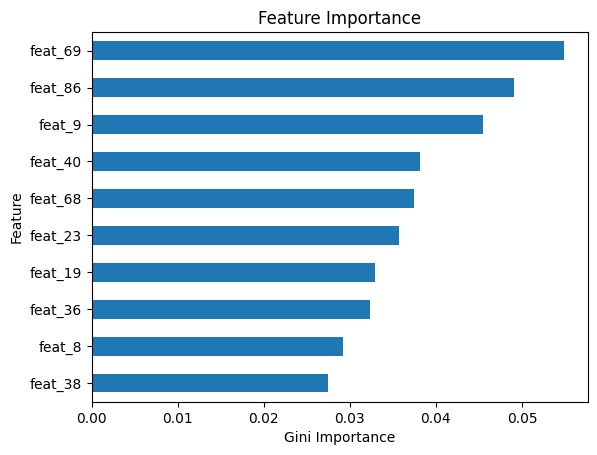

In [116]:
# Create a horizontal bar chart with the 10 most important features for your model. Be sure to label the x-axis "Gini Importance", the y-axis "Feature",
#  and use the title "Feature Importance".

features= X_train.columns

importances = model.best_estimator_.feature_importances_

feat_imp = pd.Series(importances, index = features).sort_values()

feat_imp.tail(10).plot(kind="barh")

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");


In [117]:
import pickle

with open("model_taiwan.pkl", "wb") as file:
    pickle.dump(model, file)

In [125]:
# import the model we created

from prediction import make_prediction

# Generate predictions
y_test_pred = make_prediction(
    data_file="../data/data.csv",
    model_path="model_taiwan.pkl"
)


print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

To read json file

with gzip.open(filepath, "r") as file:

    data = json.load(file)

print(data)





<!-- with gzip.open("data/taiwan-bankruptcy-data.json.gz", "r") as file:
    taiwan_data = json.load(file)

    
    def wrangle(filepath):
    with gzip.open(filepath, "r") as f:
        data = json.load(f)
        
        
    df = pd.DataFrame().from_dict(data["observations"]).set_index("id")
    return df
     -->